In [1]:
import copy
import training
# Load Params
exec(open('lorenzExample.py').read())

/home/lenci/Documents/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lenci/Documents/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lenci/Documents/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lenci/Documents/venv1/lib/python3.6/site-packages/tensorflow/

In [2]:
for count in range(1):  # loop to do random experiments
    count = 1
    print('### ----- CHECK START ----- ###:',count)
    training.main_exp(copy.deepcopy(params))
    print('### ----- CHECK END ----- ###')


### ----- CHECK START ----- ###: 1
setting default name of experiment
setting default path for model
[3, 30, 30, 3, 3, 30, 30, 3]
[1, 10, 10, 10, 2]
[1, 10, 10, 10, 1]
setting default: activation function is ReLU
setting default: choosing random seed of 57366288 and saving to params
setting default: distribution for weights on main net is tn (truncated normal)
setting default: distribution for weights on auxiliary net is tn (truncated normal)
setting default: biases in main net will be init. to default number
setting default: biases in auxiliary net will be init. to default number
setting default: scale for weights in main net is 0.1 (applies to tn distribution)
setting default: scale for weights in omega net is 0.1 (applies to tn distribution)
setting default: loss is not relative
setting default: penalty on all shifts from 1 to num_shifts
setting default: penalty on all middle shifts from 1 to num_shifts_middle
setting default: weight on loss3 is 1.0
setting default: use Adam optimiz

In [3]:
#import numpy as np
#train_val_error = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
#train_val_error = np.matrix(train_val_error)
#count = 1
#print('train_val_error:',train_val_error, 'count:', range(count))
#train_val_error = train_val_error[range(count), :]
#print(train_val_error)

In [4]:
%matplotlib inline

this extension makes it easy to reload the imports without restarting the whole notebook

In [5]:
%load_ext autoreload

run this cell if you want to reload the imports (i.e. you changed notebookfns.py)

In [6]:
%autoreload

In [7]:
# these are all standard Python modules
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle

In [8]:
# this is my notebookfns.py file
import notebookfns as n

In [9]:
font = {'family' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('lines', linewidth=3)
plt.rc('axes', linewidth=3)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)

note that these errors include the weights alpha_1, alpha_2, alpha_3
red is training error, blue is validation error


/home/lenci/Documents/venv3/PCNN_chaos_v2/PCNNdeepK_and_DMD/deepK/GET_MANIFOLD1/notebookfns.py:10: RuntimeWarning: divide by zero encountered in log10
  errors[:, j] = np.log10(errors[:, j])
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


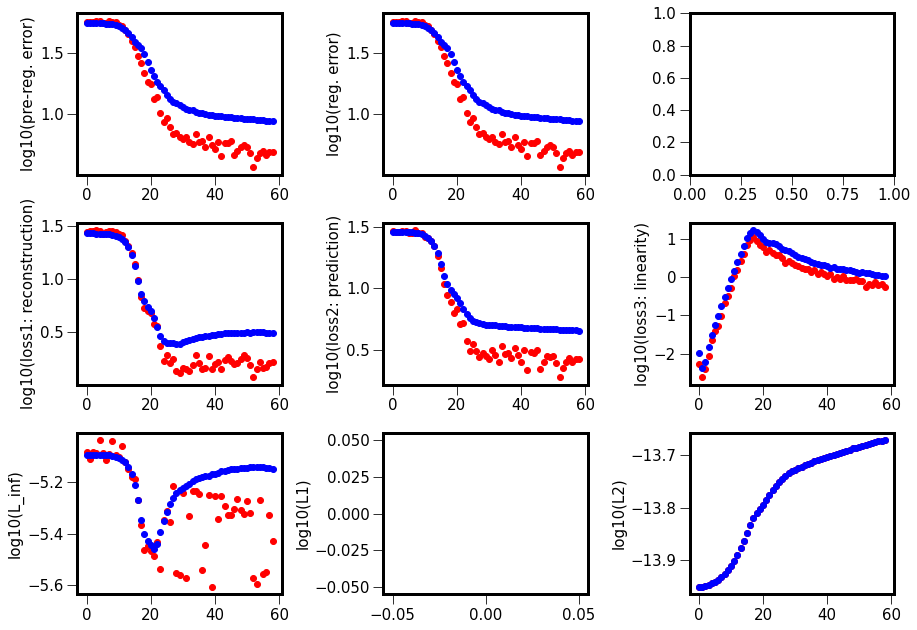

In [10]:
# You can change this filename to point to the pickle file for your model.
# Later code loads the related files (i.e. weights & biases) by changing the end of the filename
fname = './exp1_best/lorenzExample_2022_11_09_20_19_40_407815_model.pkl'
errors = np.loadtxt(fname.replace('model.pkl','error.csv'),delimiter=',')
n.PlotErrors(errors, range(0,16))

In [11]:
# you may need the encoding part if you save the pickle file in Python 2 and load it in Python 3 
with open(fname, 'rb') as f:
    params = pickle.load(f, encoding='latin1')

In [12]:
print('validation error: %.2E' % params['minTest'])

validation error: 8.67E+00


In [13]:
print('We had %d files of training data.' % params['data_train_len'])
print('Length of trajectories: %d steps (goes in Table 2)' % params['len_time'])
print('Batch size: %d (goes in Table 2)' % params['batch_size'])
deltat = params['delta_t']
print('delta_t (time stepping in data): %.3f' % deltat)
T = deltat*(params['len_time']-1)
tSpan = np.linspace(start=0,stop=T,num=params['len_time'],endpoint=True)
print("Time span is %r" % tSpan)

We had 1 files of training data.
Length of trajectories: 50 steps (goes in Table 2)
Batch size: 120 (goes in Table 2)
delta_t (time stepping in data): 0.010
Time span is array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49])


In [14]:
print("For Table 4:")
print('log10 of alpha_1 (the weight on losses involving reconstruction): %.1f' % np.log10(params['recon_lam']))
print('log10 of alpha_2 (the weight on L_inf term): %.1f' % np.log10(params['Linf_lam']))
print('log10 of alpha_3 (the weight on L_2 regularization): %.1f' % np.log10(params['L2_lam']))

For Table 4:
log10 of alpha_1 (the weight on losses involving reconstruction): -1.0
log10 of alpha_2 (the weight on L_inf term): -7.0
log10 of alpha_3 (the weight on L_2 regularization): -15.0


In [15]:
print('The training was allowed to run up to %.1f hours' % (params['max_time']/(60*60)))
print('The training actually ran for %.1f hours' % (params['time_exp']/(60*60)))
if 'stop_condition' in params:
    print('The stop condition was: %s' % params['stop_condition'])
else:
    print('The stop condition was not labeled.')

The training was allowed to run up to 4.0 hours
The training actually ran for 0.1 hours
The stop condition was: too slowly improving in first 5 min


In [16]:
print('Did we do the autoencoder pre-training? %d' % params['auto_first'])
print('The learning rate was %.2E' % params['learning_rate'])

Did we do the autoencoder pre-training? 0
The learning rate was 1.00E-03


In [17]:
depth = (params['d']-4)/2
print("For Table 3:")
print('The encoder and decoder each had %d hidden layers.' % depth)
print('The widths of the layers of the main network were %r.' % params['widths'])
print('The aux. network had %d hidden layers.' % len(params['hidden_widths_omega']))
print('The widths of the hidden layers of the aux. network were %r.' % params['hidden_widths_omega'])

For Table 3:
The encoder and decoder each had 2 hidden layers.
The widths of the layers of the main network were [3, 30, 30, 3, 3, 30, 30, 3].
The aux. network had 3 hidden layers.
The widths of the hidden layers of the aux. network were [10, 10, 10].


In [18]:
print('We penalized %d (S_p) steps for prediction. (goes in Table 4)' % params['num_shifts'])
print('We penalized %d steps in the linearity loss.' %params['num_shifts_middle'])

We penalized 30 (S_p) steps for prediction. (goes in Table 4)
We penalized 49 steps in the linearity loss.


In [19]:
# load all of the weights and biases into W and b dictionaries
W, b = n.load_weights_koopman(fname, len(params['widths'])-1, len(params['widths_omega_real'])-1, params['num_real'], params['num_complex_pairs'])

In [20]:
# load the validation data
params['data_name'] = 'lorenzExample' # temp fix
X = np.loadtxt('./data/%s_val_x.csv' % params['data_name'],delimiter=',')

In [21]:
# reshape the validation data
max_shifts_to_stack = n.num_shifts_in_stack(params)
X_stacked, num_traj_val = n.stack_data(X, max_shifts_to_stack, params['len_time'])
print("We used %d trajectories in the validation set." % num_traj_val)
print("See lorenzExample.m: used 480*.2")

# Xk is just the initial conditions of each trajectory
Xk = np.squeeze(X_stacked[0,:,:])

We used 93 trajectories in the validation set.
See lorenzExample.m: used 480*.2


In [22]:
# apply the network to just the initial conditions Xk
# output the data transformed to y-coordinates (steps k, k+1, k+2, k+3 are steps 0, 1, 2, 3 here)
# also output the reconstructed Xk and the predictions for three steps
yk, ykplus1, ykplus2, ykplus3, xk_recon, xkplus1, xkplus2, xkplus3 = n.ApplyKoopmanNetOmegas(Xk, W, b, params['delta_t'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

In [23]:
# here apply the network to the full dataset
# output list of predictions y and list of encded data g_list, like in the training code
y, g_list = n.ApplyKoopmanNetOmegasFull(X_stacked, W, b, params['delta_t'], params['num_shifts'], params['num_shifts_middle'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

In [24]:
# calculate the validation loss, split over the loss components
loss1_val, loss2_val, loss3_val, loss_Linf_val, loss_val = n.define_loss(X_stacked, y, g_list, params, W, b)

In [25]:
print('Reconstruction loss (on validation set): %.4E' % loss1_val)
print('Prediction loss (on validation set): %.4E' % loss2_val)
print('Linearity loss (on validation set): %.4E' % loss3_val)
print('L_inf loss (on validation set): %.4E' % loss_Linf_val)
print('Pre-regularization loss (on validation set): %.4E (goes in Table 1)' % loss_val)

Reconstruction loss (on validation set): 3.0775E+00
Prediction loss (on validation set): 4.5348E+00
Linearity loss (on validation set): 1.0614E+00
L_inf loss (on validation set): 7.0815E-06
Pre-regularization loss (on validation set): 8.6737E+00 (goes in Table 1)


In [26]:
loss_L1_val, loss_L2_val, regularized_loss_val = n.define_regularization(params, W, b, loss_val)
print('L1 penalty (on weights): %.4E' % loss_L1_val)
print('L2 penalty (on weights): %.4E' % loss_L2_val)
print('Total regularized loss (on validation set): %.4E' % regularized_loss_val)

L1 penalty (on weights): 0.0000E+00
L2 penalty (on weights): 2.1350E-14
Total regularized loss (on validation set): 8.6737E+00


In [27]:
print('Sanity check:')
print('Compare to validation loss recorded during training: %.4E' % params['minTest'])
print('Compare to regularized validation loss recorded during training: %.4E' %params['minRegTest'])

Sanity check:
Compare to validation loss recorded during training: 8.6737E+00
Compare to regularized validation loss recorded during training: 8.6737E+00


In [28]:
# apply the auxiliary network to the encoded data
omegas = n.omega_net_apply(yk, W, b, params['num_real'], params['num_complex_pairs'], params['num_omega_weights'])

In [29]:
# The auxiliary network outputs the parameters for the eigenvalues in the K matrix.
# For each real eigenvalue, the continuous time version would be mu
# The discrete time version is exp(mu delta t)
# the auxliary network outputs mu for each eigenvalue
print('Mu1 ranges from %.6f to %.6f (little variation in the amount of decay)' % (np.min(omegas[0]), np.max(omegas[0])))
print('Mu2 ranges from %.6f to %.6f (little variation in the amount of decay)' % (np.min(omegas[1]), np.max(omegas[1])))
print('Recall: delta_t = %.2f' % deltat) 

Mu1 ranges from -0.619321 to 0.207283 (little variation in the amount of decay)
Mu2 ranges from -0.210519 to 0.050882 (little variation in the amount of decay)
Recall: delta_t = 0.01


In [30]:
print('To set axis ticks on next two figures:')
print('The first y coordinate ranges from %.3f to %.3f.' % (np.min(yk[:,0]), np.max(yk[:,0])))
print('The second y coordinate ranges from %.3f to %.3f.' % (np.min(yk[:,1]), np.max(yk[:,1])))

To set axis ticks on next two figures:
The first y coordinate ranges from 1.869 to 9.281.
The second y coordinate ranges from -6.426 to -1.219.


In [31]:
print(yk.shape)

(93, 3)


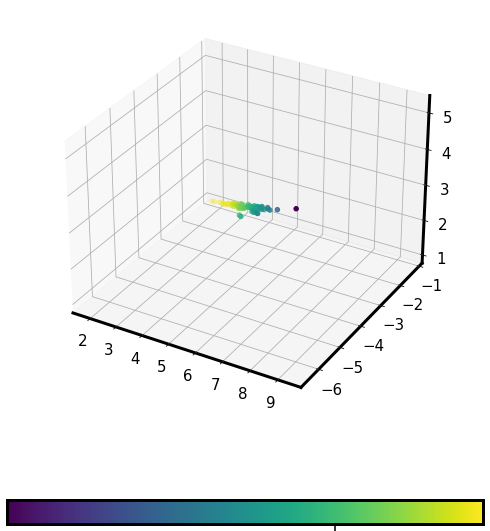

In [32]:
# Supplementary Figure 3
fig = plt.figure(figsize=(16/3*2,16/3*2))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(np.asarray(yk[:,0]), np.asarray(yk[:,1]), np.asarray(yk[:,2]), c=np.asarray(omegas[0]))
CBI = plt.colorbar(sc, orientation='horizontal', shrink=.8, ticks = [-.0525, -.0494])
CBI.ax.set_xticklabels(['',''])

#xlab = [-.5,0,.5]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.3, 0, .3]
#plt.yticks(ylab, xlabels)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.axis('auto')
#ax.axis('equal')

plt.savefig('ToyExampleEvals1.svg', dpi=200, transparent=True)
plt.show()

(93, 3)
(93, 3)


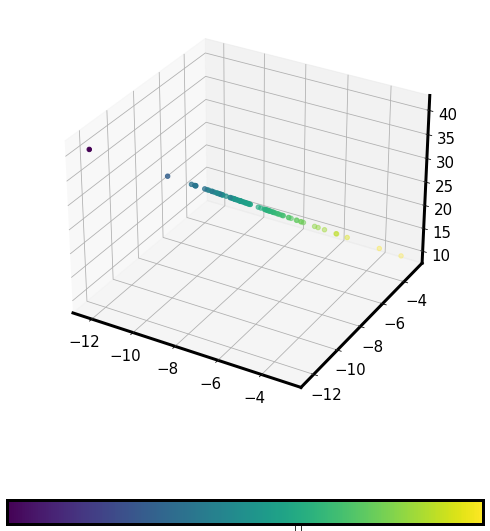

In [33]:
# Supplementary Figure 3
print(Xk.shape)
print(xk_recon.shape)
fig = plt.figure(figsize=(16/3*2,16/3*2))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(np.asarray(xkplus1[:,0]), np.asarray(xkplus1[:,1]), np.asarray(xkplus1[:,2]), c=np.asarray(omegas[1]))
CBI = plt.colorbar(sc, orientation='horizontal', shrink=.8, ticks = [-.0525, -.0494])
CBI.ax.set_xticklabels(['',''])

#xlab = [-.5,0,.5]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.3, 0, .3]
#plt.yticks(ylab, xlabels)
#plt.ylim([-.4, .55])
#plt.xlim([-.4, .4])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.axis('auto')

plt.savefig('ToyExampleEvals2.svg', dpi=200, transparent=True)
plt.show()

In [34]:
print('Reconstruction error on initial conditions: %.2E' % np.mean(np.square(Xk - xk_recon)))
print('1-step prediction error on initial conditions: %.2E' % np.mean(np.square(xkplus1 - np.squeeze(X_stacked[1,:,:]))))
print('2-step prediction error on initial conditions: %.2E' % np.mean(np.square(xkplus2 - np.squeeze(X_stacked[2,:,:]))))

Reconstruction error on initial conditions: 3.08E+01
1-step prediction error on initial conditions: 2.98E+01
2-step prediction error on initial conditions: 2.90E+01


In [35]:
print('Relative reconstruction error on initial conditions: %.2E' % (np.mean(np.square(Xk - xk_recon))/np.mean(np.square(Xk))))
print('Relative 1-step prediction error on initial conditions: %.2E' % (np.mean(np.square(xkplus1 - np.squeeze(X_stacked[1,:,:])))/np.mean(np.square(np.squeeze(X_stacked[1,:,:])))))
print('Relative 2-step prediction error on initial conditions: %.2E' % (np.mean(np.square(xkplus2 - np.squeeze(X_stacked[2,:,:])))/np.mean(np.square(np.squeeze(X_stacked[2,:,:])))))

Relative reconstruction error on initial conditions: 1.15E-01
Relative 1-step prediction error on initial conditions: 1.11E-01
Relative 2-step prediction error on initial conditions: 1.08E-01


In [36]:
data = Xk.copy()

In [37]:
# For other plots, it's helpful to consider a full grid of input data
# Create a mesh grid and reshape it
xvals = np.linspace(np.min(data[:,0]),np.max(data[:,0]),100)
yvals = np.linspace(np.min(data[:,1]),np.max(data[:,1]),100)
zvals = np.linspace(np.min(data[:,2]),np.max(data[:,2]),100)
X, Y, Z = np.meshgrid(xvals, yvals, zvals)

grid = np.zeros((1000000,3))
grid[:,0] = np.reshape(X, (1000000,))
grid[:,1] = np.reshape(Y, (1000000,))
grid[:,2] = np.reshape(Z, (1000000,))
print(grid.shape)

(1000000, 3)


In [38]:
# Apply the network to the whole grid
grid_yk, grid_ykplus1, grid_ykplus2, grid_ykplus3, grid_xk_recon, grid_xkplus1, grid_xkplus2, grid_xkplus3 = n.ApplyKoopmanNetOmegas(grid, W, b, params['delta_t'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

In [39]:
import tensorflow as tf
grid_reshaped0 = tf.reshape(grid_yk[:,0], [100,100,100])
grid_reshaped1 = tf.reshape(grid_yk[:,1], [100,100,100])
grid_reshaped2 = tf.reshape(grid_yk[:,2], [100,100,100])
#grid_reshaped0 = grid_yk[:,0].reshape(100,100,100)
#grid_reshaped1 = grid_yk[:,1].reshape(100,100,100)
#grid_reshaped2 = grid_yk[:,2].reshape(100,100,100)

In [40]:
# Nice to draw a black outline
outline_x1 = np.asarray([-0.5, -0.5, 0.5])
outline_y1 = np.asarray([-0.5, 0.5, 0.5])
outline_x2 = np.asarray([-0.5, 0.5, 0.5])
outline_y2 = np.asarray([-0.5, -0.5, 0.5])

In [41]:
# calculate range of eigenfunction value in order to make colormap good and choose good levels to plot
print("1st eigenfunction ranges from %.4f to %.4f" % (np.min(grid_yk[:,0]), np.max(grid_yk[:,0])))
grid_reshaped0_max = np.max(np.abs(grid_yk[:,0]))

1st eigenfunction ranges from 0.8967 to 15.8617


In [42]:
# Supplementary Figure 2
#n.EigenfunctionPlot('PuOr',grid_reshaped0, outline_x1, outline_y1, outline_x2, 
                    #outline_y2, X, Y, filename='ToyExampleEigenfunction1.png',
                   #levels=np.arange(-.4,.6,.2), cbTicks=[-.4,0,.4],
                   #climits=[-grid_reshaped0_max, grid_reshaped0_max])

In [43]:
#print("2nd eigenfunction ranges from %.4f to %.4f" % (np.min(grid_reshaped1), np.max(grid_reshaped1)))
#grid_reshaped1_max = np.max(np.abs(grid_reshaped1))

In [44]:
# Supplementary Figure 2
#n.EigenfunctionPlot('PuOr',grid_reshaped1, outline_x1, outline_y1, outline_x2,
                    #outline_y2, X, Y, filename='ToyExampleEigenfunction2.png',
                   #levels=np.arange(-.2,.3,.1), cbTicks=[-.26,0,.26],
                   #climits=[-grid_reshaped1_max, grid_reshaped1_max])

In [45]:
from sklearn import linear_model

In [46]:
# Ax = y, x in [num_ex, 2], y in [num_ex, 2], A is [num_ex, num_ex] 
print("Do linear regression to see how results compare to analytic option we know works.")
num_ex = grid.shape[0]
print(num_ex)
grid_aug = np.zeros((num_ex,10))
print(grid_aug.shape)
grid_aug[:,0] = np.ones((num_ex,))
grid_aug[:,1:4] = grid
grid_aug[:,4] = np.square(grid[:,0])
grid_aug[:,5] = np.square(grid[:,1])
grid_aug[:,6] = np.square(grid[:,2])
grid_aug[:,7] = np.multiply(grid[:,0],grid[:,1])
grid_aug[:,8] = np.multiply(grid[:,0],grid[:,2])
grid_aug[:,9] = np.multiply(grid[:,1],grid[:,2])
coeff = np.linalg.lstsq(grid_aug, grid_yk)
print(coeff)

Do linear regression to see how results compare to analytic option we know works.
1000000
(1000000, 10)


/home/lenci/Documents/venv1/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


(matrix([[ 2.98573386e+00, -2.38981918e+00,  1.79126263e+00],
        [ 2.99141565e-02, -3.31169667e-02,  1.93138991e-02],
        [-1.63890475e-01,  1.23482991e-01, -8.92012106e-02],
        [-4.77326765e-02,  5.63124555e-02, -2.76483763e-02],
        [ 1.80796682e-03, -1.08691282e-03,  4.90840245e-04],
        [ 2.16159052e-03, -1.78886020e-03,  1.32807117e-03],
        [ 4.87242522e-03, -3.96000616e-03,  2.56578881e-03],
        [-2.67793374e-03,  2.27142660e-03, -1.67838601e-03],
        [ 4.96650810e-03, -3.78428200e-03,  2.58249807e-03],
        [ 3.82169762e-04, -3.86938553e-04,  1.22762813e-05]]), matrix([[414656.70867453, 265023.4226361 , 137777.06319899]]), 10, array([8.80968071e+05, 4.32312472e+05, 2.15863741e+05, 1.69915744e+05,
       9.14812535e+04, 6.69794974e+04, 5.42266333e+03, 3.75575780e+03,
       2.34134372e+03, 2.62879241e+02]))


In [47]:
print("Do linear regression with Lasso penalty to zero out most coefficients, making it easier to interpret")
clf = linear_model.Lasso(alpha=0.0005)
clf.fit(grid_aug, grid_yk)
print(clf.coef_)
print(clf.coef_[1,2]/clf.coef_[1,3])
rescaledb = clf.coef_[1,3]/(clf.coef_[0,1]**2)
print("compare scaling")
print(clf.coef_[1,2]/rescaledb)

Do linear regression with Lasso penalty to zero out most coefficients, making it easier to interpret
[[ 0.00000000e+00  2.98030645e-02 -1.63853455e-01 -4.77017029e-02
   1.80345998e-03  2.16277360e-03  4.87185794e-03 -2.67853699e-03
   4.96777068e-03  3.82144273e-04]
 [ 0.00000000e+00 -3.30059105e-02  1.23445861e-01  5.62815086e-02
  -1.08240600e-03 -1.79004540e-03 -3.95943894e-03  2.27202823e-03
  -3.78554419e-03 -3.86911872e-04]
 [ 0.00000000e+00  1.92028475e-02 -8.91640688e-02 -2.76174343e-02
   4.86333430e-04  1.32925658e-03  2.56522163e-03 -1.67898747e-03
   2.58376018e-03  1.22494374e-05]]
2.1933644606855345
compare scaling
0.0019481960042357412


In [48]:
# Load some nice evenly spaced trajectories that are good for plotting
trajs = np.loadtxt('lorenzExample_train1_x.csv', delimiter=',')
print(trajs)
trajs  = trajs.reshape((trajs.shape[0],int(trajs.shape[1]/3), 3))
print(trajs)

[[ -1.42467552 -13.34734074  33.92374714]
 [ -2.54786907 -13.10387726  33.29194928]
 [ -3.53896674 -12.82075811  32.80665198]
 ...
 [ -7.44928628  -6.65465492  26.83031984]
 [ -7.3749084   -6.68276649  26.61190366]
 [ -7.31099792  -6.72554813  26.39725829]]
[[[ -1.42467552 -13.34734074  33.92374714]]

 [[ -2.54786907 -13.10387726  33.29194928]]

 [[ -3.53896674 -12.82075811  32.80665198]]

 ...

 [[ -7.44928628  -6.65465492  26.83031984]]

 [[ -7.3749084   -6.68276649  26.61190366]]

 [[ -7.31099792  -6.72554813  26.39725829]]]


In [49]:
from matplotlib import cm

In [50]:
# We plot some nice trajectories from this system
# Left side of Figure 3
# create a special color map (version of ocean color map)
start = 0.0
stop = 1.0
number_of_lines= 25 
#cm_subsection = np.linspace(start, stop, number_of_lines) 

#colors = [ cm.ocean(x) for x in cm_subsection ]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
fig.set_figwidth(16/3*2)
fig.set_figheight(16/3*2)
print(trajs.shape)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.scatter(temp[:,0],temp[:,1],temp[:,2])
    #print(temp)
#xlab = [-.4,0,.4]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.4, 0, .4]
#plt.yticks(ylab, xlabels)
#plt.ylim([-.4, .55])
#plt.xlim([-.4, .4])
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
#ax.spines['top'].set_color('none')
#plt.savefig('ToyExample.svg', dpi=200, transparent=True)

(16340, 1, 3)


/home/lenci/Documents/venv1/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: need at least one array to concatenate

<Figure size 768x768 with 1 Axes>

In [51]:
trajs_yk = np.zeros(trajs.shape)
trajs_recon = np.zeros(trajs.shape)
trajs_pred = np.zeros(trajs.shape)
trajs_lambdas = np.zeros(trajs.shape)

print('Eigenvalues for each traj. Note: about constant')
for j in np.arange(trajs.shape[0]):
    traj = np.squeeze(trajs[j,:,:])
    # apply the network to each trajectory
    traj_yk, traj_ykplus1, traj_ykplus2, traj_ykplus3, traj_xk_recon, traj_xkplus1, traj_xkplus2, traj_xkplus3 = n.ApplyKoopmanNetOmegas(traj, W, b, params['delta_t'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

    trajs_yk[j,:,:] = traj_yk.copy()
    trajs_recon[j,:,:] = traj_xk_recon.copy()
    trajs_pred[j,:,:] = traj_xkplus1.copy()
    
    # apply the auxiliary network to each one
    continuous_evals = n.omega_net_apply(traj_yk, W, b, params['num_real'], params['num_complex_pairs'], params['num_omega_weights'])

    # what's the average eigenvalue for this trajectory?
    # (note that for this system, we expect this to be constant along trajectories)
    # note that this is the discrete case: exp(lambda * deltat) if lambda is the eigenvalue in the continuous case
    mean_discrete_evals = np.zeros((len(continuous_evals),))
    for k in np.arange(trajs.shape[2]):
        mean_discrete_evals[k] = np.exp(np.mean(continuous_evals[k], axis=0)*params['delta_t'])
    print(mean_discrete_evals)
    
    # calculate eval^k for k = 0, 1, ....
    # should match if really have linear system    
    for k in np.arange(trajs.shape[1]):
        for l in np.arange(trajs.shape[2]):
            trajs_lambdas[j,k,l] = np.power(mean_discrete_evals[l],k)


Eigenvalues for each traj. Note: about constant
[0.99404615 0.99777435 0.99722324]
[0.99454678 0.9979441  0.99743892]
[0.99501217 0.99809475 0.9976309 ]
[0.99545523 0.99822797 0.99780118]
[0.99584584 0.99834562 0.99795209]
[0.9961908  0.99844965 0.99808608]
[0.9964966  0.99854189 0.99820548]
[0.9967692  0.99862405 0.99831245]
[0.9970139  0.99869764 0.99840892]
[0.99723529 0.99876399 0.99849654]
[0.99743724 0.99882421 0.99857671]
[0.99762295 0.99887923 0.99865058]
[0.997795   0.9989298  0.99871908]
[0.99795544 0.99897652 0.99878292]
[0.99810584 0.99901989 0.99884267]
[0.99824809 0.99906113 0.99890038]
[0.99838231 0.99909959 0.99895456]
[0.99850887 0.99913514 0.9990048 ]
[0.99862832 0.99916803 0.99905139]
[0.99874105 0.99919845 0.99909458]
[0.99884739 0.99922659 0.99913459]
[0.99894762 0.99925262 0.99917161]
[0.99904226 0.99927702 0.99920647]
[0.99913177 0.9993002  0.99923985]
[0.99921593 0.99932175 0.99927089]
[0.99929494 0.99934176 0.99929967]
[0.99936899 0.99936032 0.99932631]
[0.9994

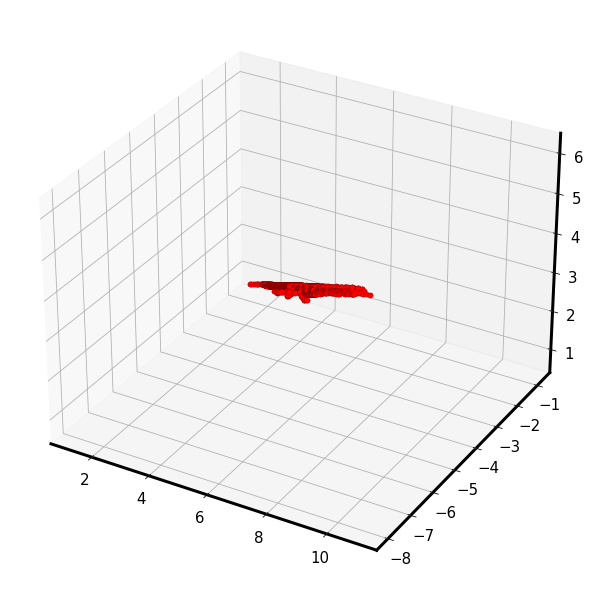

In [52]:
# Right side of Figure 3
# to check if really linear, 
# compare normalized eval^k (k = 0, 1, ...) to the y-coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_figwidth(16/3*2)
fig.set_figheight(16/3*2)

subset = np.arange(0,trajs.shape[1],4)

for j in np.arange(trajs.shape[0]):
    scale0 = trajs_yk[j,0,0]
    scale1 = trajs_yk[j,0,1]
    scale2 = trajs_yk[j,0,2]
    plt.plot(np.array(trajs_lambdas[j,:,0]*scale0), np.array(trajs_lambdas[j,:,1]*scale1), np.array(trajs_lambdas[j,:,2]*scale2), 'k', linewidth=2)
    ax.scatter(np.array(trajs_lambdas[j,:,0]*scale0), np.array(trajs_lambdas[j,:,1]*scale1), np.array(trajs_lambdas[j,:,2]*scale2), color='k')
    ax.scatter(np.array(trajs_yk[j,subset,0]),np.array(trajs_yk[j,subset,1]),np.array(trajs_yk[j,subset,2]), color='r')

    
#plt.axis('equal')
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
#ax.spines['top'].set_color('none')
#xlab = [-.4,0,.4]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.15, 0, .2]
#plt.yticks(ylab, xlabels)
#plt.ylim([-.4, .55])
#plt.xlim([-.4, .4])


plt.savefig('ToyExampleLinear.svg', dpi=200, transparent=True)


In [ ]:
# plot reconstruction error
fig = plt.figure(figsize=(16/3*2, 16/3*2))
ax = fig.add_subplot(111,projection='3d')
subset = np.arange(0,trajs.shape[1],4)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1],temp[:,2], 'k', linewidth=2)
    plt.scatter(temp[:,0],temp[:,1],temp[:,2], color='k')
    temp2 = trajs_recon[j,:,:].copy()
    plt.scatter(temp2[subset,0],temp2[subset,1],temp2[subset,2],color='red')
    
#plt.axis('equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#xlab = [-.4,0,.4]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.4, 0, .4]
#plt.yticks(ylab, xlabels)


#plt.savefig('ToyExampleRecon.png', dpi=200, transparent=True)

In [ ]:
# plot 1-step prediction error
fig = plt.figure(figsize=(16/3*2, 16/3*2))
ax = fig.add_subplot(111,projection='3d')
subset = np.arange(0,trajs.shape[1],4)

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1],temp[:,2], 'k', linewidth=2)
    plt.scatter(temp[:,0],temp[:,1],temp[:,2],color='k')
    temp2 = trajs_pred[j,:,:].copy()
    plt.scatter(temp2[subset,0],temp2[subset,1],temp2[subset,2],color='red')
    
#plt.axis('equal')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#xlab = [-.4,0,.4]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.4, 0, .4]
#plt.yticks(ylab, xlabels)


In [ ]:
# now apply network to these trajectories again, but this time for many steps
# this time, only network initial condition of each trajectory.
trajs_long_pred = np.zeros(trajs.shape)

num_steps = trajs.shape[1]-1

for j in np.arange(trajs.shape[0]):
    ic = np.squeeze(trajs[j,0,:])
    trajs_long_pred[j,0,:] = ic
    trajs_long_pred[j,1:,:] = n.PredictKoopmanNetOmegas(ic, W, b, deltat, num_steps, params['num_real'], params['num_complex_pairs'], 
                                                        params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

In [ ]:
# Supplementary Figure 1b
# plot long-term prediction:
# if only give network initial condition, then have network predict many steps, how long is it accurate?

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

for j in np.arange(trajs.shape[0]):
    temp = trajs[j,:,:].copy()
    plt.plot(temp[:,0],temp[:,1],temp[:,2], 'k', linewidth=2)
    temp2 = trajs_long_pred[j,:,:].copy()
    
    diffs = np.linalg.norm(temp - temp2,ord=2,axis=1)

    normalize = np.linalg.norm(temp,ord=2,axis=1)
    relerr = diffs/normalize
    print("trajectory %d: worst rel. error %.3f" % (j, np.max(relerr)))
    indBigErr = np.nonzero(relerr > .1) # 10% error 
    if len(indBigErr[0]) > 0:
        print("\tfirst ind with error > 10p: %d of %d"  % (indBigErr[0][0], trajs.shape[1]))
        indEnd = indBigErr[0][0]
    else:
        indEnd = trajs.shape[1]

    subset = np.arange(0,indEnd,4)
    plt.scatter(temp2[subset,0],temp2[subset,1],temp2[subset,2],color='red')
    
#xlab = [-.4,0,.4]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-.4, 0, .4]
#plt.yticks(ylab, xlabels)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.savefig('ToyExampleLongPrediction.svg', dpi=200, transparent=True)

In [ ]:
# shape: num_examples, num_steps, n
# send initial conditions through network again, but predict many steps (50)
print('We now predict the initial conditions %d steps forward' % max_shifts_to_stack)
long_pred_Xk = n.PredictKoopmanNetOmegas(Xk, W, b, deltat, max_shifts_to_stack, params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

In [ ]:
# how does prediction error change with the number of prediction steps?
# we expect it to accumulate error, but hopefully not too fast
long_pred_error = np.zeros((max_shifts_to_stack, ))
for j in np.arange(max_shifts_to_stack):
    long_pred_error[j] = np.mean(np.mean(np.square(long_pred_Xk[:,j,:] - X_stacked[j+1,:,:]), axis=0)) 

In [ ]:
# so we can put ticks in good places
print('log10 error ranges from %.2f to %.2f' % (min(np.log10(long_pred_error)), max(np.log10(long_pred_error))))

In [ ]:
# Supplementary Figure 1a
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figwidth(16)
fig.set_figheight(16/3*2)

plt.plot(np.arange(max_shifts_to_stack), np.log10(long_pred_error), linewidth=3)

xlab = [0,max_shifts_to_stack/2, max_shifts_to_stack]
#xlabels = ''
#plt.xticks(xlab,xlabels)
#ylab = [-5.7,-6.4,-7.0]
#ylabels = ''
#plt.yticks(ylab,ylabels)
fig.savefig('ToyExamplePredOverSteps.svg', dpi=200, transparent=True)

In [ ]:
# moved this to the bottom because it's so slow
loss1_train, loss2_train, loss3_train, loss_Linf_train, loss_train, regularized_loss_train, total_num_traj = n.loss_training(params, max_shifts_to_stack, W, b)
print("# training traj: %d (goes in Table 2)" % total_num_traj)
print("Note: accidentally reported in paper that we used more data than we did.")
print("See DiscreteSpectrumExample.m: used 5000*.7 = 3500 per file, not 5000")

In [ ]:
print('Reconstruction loss (on train set): %.4E' % loss1_train)
print('Prediction loss (on train set): %.4E' % loss2_train)
print('Linearity loss (on train set): %.4E' % loss3_train)
print('L_inf loss (on train set): %.4E' % loss_Linf_train)
print('Pre-regularization loss (on train set): %.4E (goes in Table 1)' % loss_train)
print('Total regularized loss (on train set): %.4E' % regularized_loss_train)

# Test error

DO NOT CALCULATE UNTIL READY TO REPORT FINAL RESULTS

In [ ]:
## We decided to report this example in the paper, so now we can calcuate test errror
#loss1_test, loss2_test, loss3_test, loss_Linf_test, loss_test, regularized_loss_test = n.loss_test(params, max_shifts_to_stack, W, b)
#print("Note: accidentally reported in paper that we used more data than we did.")
#print("See DiscreteSpectrumExample.m: used 5000*.1 = 500 for testing, not 5000")

In [ ]:
#print('Reconstruction loss (on test set): %.4E' % loss1_test)
#print('Prediction loss (on test set): %.4E' % loss2_test)
#print('Linearity loss (on test set): %.4E' % loss3_test)
#print('L_inf loss (on test set): %.4E' % loss_Linf_test)
#print('Pre-regularization loss (on test set): %.4E (goes in Table 1)' % loss_test)
#print('Total regularized loss (on test set): %.4E' % regularized_loss_test)

In [ ]:
#print("Could be that error would be higher on larger test set, so try larger one.")
#print("Check test error on larger test set:")
#loss1_testextra, loss2_testextra, loss3_testextra, loss_Linf_testextra, loss_testextra, regularized_loss_testextra = n.loss_test(params, max_shifts_to_stack, W, b, suffix='testextra')
#print('Reconstruction loss (on larger test set): %.4E' % loss1_testextra)
#print('Prediction loss (on larger test set): %.4E' % loss2_testextra)
#print('Linearity loss (on larger test set): %.4E' % loss3_testextra)
#print('L_inf loss (on larger test set): %.4E' % loss_Linf_testextra)
#print('Pre-regularization loss (on larger test set): %.4E (compare to numbers in Table 1)' % loss_testextra)
#print('Total regularized loss (on larger test set): %.4E' % regularized_loss_testextra)

In [ ]:
#print("Good news: error even lower on larger test set!")